<a href="https://colab.research.google.com/github/lalitmendhule/Data-Science-Internship/blob/main/task_2_LM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [4]:
import pandas as pd
dataset = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
display(dataset.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [13]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) # Convert to datetime objects
df['Month'] = df['ORDERDATE'].dt.month
df['Year'] = df['ORDERDATE'].dt.year
df['Month_Name'] = df['ORDERDATE'].dt.strftime('%B')

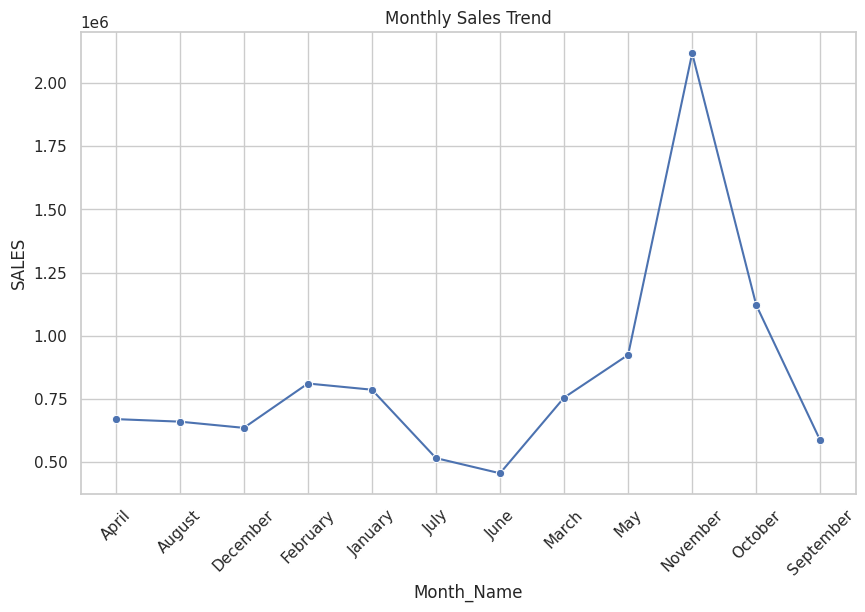

In [15]:
monthly_sales = df.groupby('Month_Name')['SALES'].sum().reset_index()

sns.lineplot(data=monthly_sales, x='Month_Name', y='SALES', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

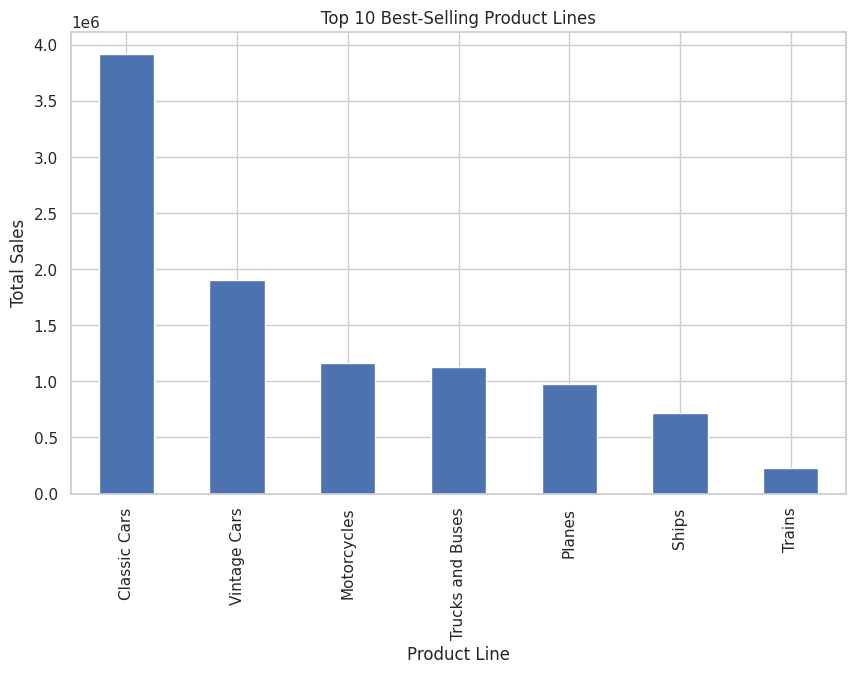

In [17]:
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

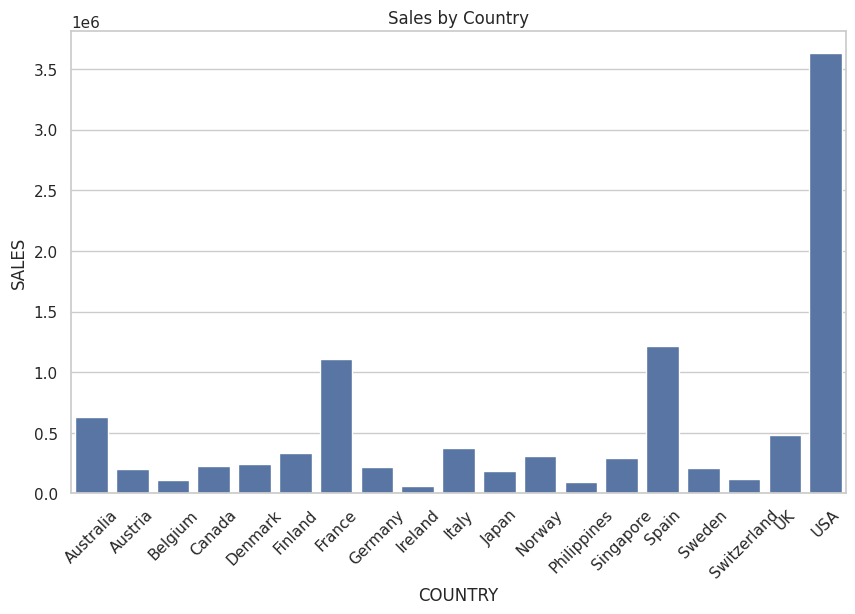

In [19]:
region_sales = df.groupby('COUNTRY')['SALES'].sum().reset_index()

sns.barplot(data=region_sales, x='COUNTRY', y='SALES')
plt.title('Sales by Country')
plt.xticks(rotation=45)
plt.show()

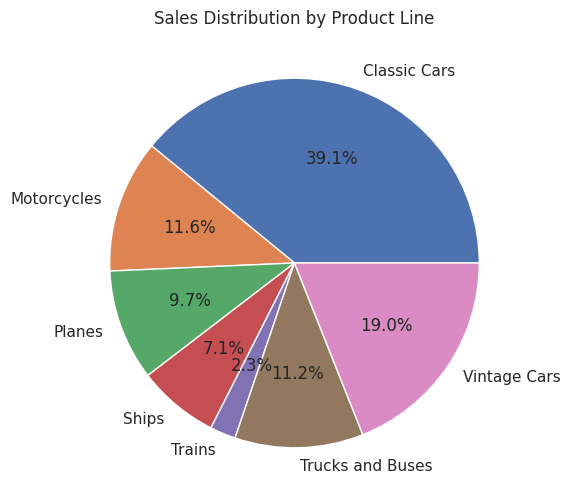

In [21]:
category_sales = df.groupby('PRODUCTLINE')['SALES'].sum()

plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Product Line')
plt.show()

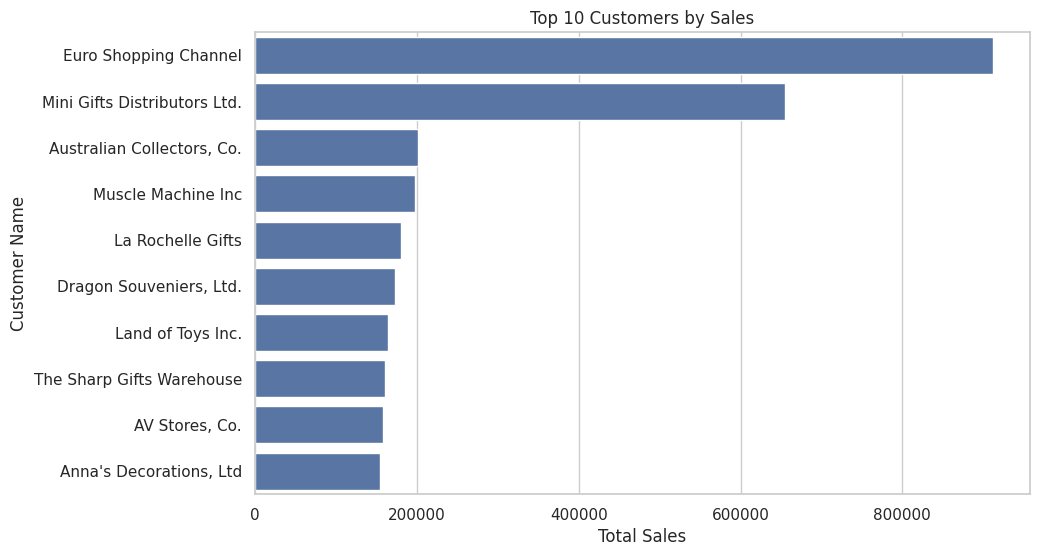

In [23]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

In [25]:
print("Total Sales:", df['SALES'].sum())
print("Best Region:", region_sales.sort_values('SALES', ascending=False).iloc[0]['COUNTRY'])
print("Best Category:", category_sales.idxmax())

Total Sales: 10032628.85
Best Region: USA
Best Category: Classic Cars
